In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [133]:
data=pd.read_csv('ikea2.csv')
data.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,kewords,topic_group,topic_desc
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Item discontinued,Item discontinued,NaN,NaN,NaN
1,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,NaN,NaN,NaN
2,50420329,FREKVENS,Bar furniture,177.0,SR 295,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN
3,400550,EKEDALEN,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN
4,40426138,HENRIKSDAL,Bar furniture,395.0,No old price,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,NaN,NaN,NaN


In [134]:
data.shape

(3694, 18)

In [135]:
data.describe()

,item_id,price,depth,height,width,topic_group
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000,1409.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853,1.102910
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771,0.852835
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000,0.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000,0.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000,1.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000,2.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000,2.000000


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item_id              3694 non-null   int64  
 1   name                 3694 non-null   object 
 2   category             3694 non-null   object 
 3   price                3694 non-null   float64
 4   old_price            3694 non-null   object 
 5   sellable_online      3694 non-null   bool   
 6   link                 3694 non-null   object 
 7   other_colors         3694 non-null   object 
 8   short_description    3694 non-null   object 
 9   designer             3694 non-null   object 
 10  depth                2231 non-null   float64
 11  height               2706 non-null   float64
 12  width                3105 non-null   float64
 13  product_description  3694 non-null   object 
 14  current_status       3694 non-null   object 
 15  kewords              1394 non-null   o

In [137]:
data.rename(columns={'kewords': 'keywords'}, inplace=True)

**Data Cleaning and Preprocessing Tasks:**

Handle Missing Values: Identify and handle missing values in columns such as depth, keywords, topic_group, and topic_desc.

In [138]:
data.isnull().sum()

,0
item_id,0
name,0
category,0
price,0
old_price,0
sellable_online,0
link,0
other_colors,0
short_description,0
designer,0


In [139]:
data['keywords'].value_counts()

,count
keywords,
white keep neat lets use Find suitable use humid,23
fitted online stylish,18
white build wide low different create perfect clean modern easy place,16
white icing small makes big Clean discreet blend right enhance modern,15
light white stained need good ‚Äì sturdy wooden lightweight slide put,13
...,...
slatted grows extend replace want change,1
bed frame w hidden several saving store want close small-space,1
slatted white extendable ‚Äì lightening made timeless easy match,1


In [140]:
data['height'].value_counts()

,count
height,
74.0,189
236.0,113
75.0,82
73.0,77
83.0,73
...,...
113.0,1
108.0,1
700.0,1


In [141]:
data['topic_desc'].value_counts()

,count
topic_desc,
Durability and Appearance,592
"Color and Aesthetics, Usability",447
Style and Functionality,370


In [142]:
data['topic_group'].value_counts()

,count
topic_group,
2.0,592
0.0,447
1.0,370


Standardize Columns: Convert relevant columns to consistent data types (e.g., price and old_price).


In [143]:
data['old_price'].value_counts()

,count
old_price,
No old price,3040
SR 995,12
"SR 1,385",11
SR 595,10
SR 275,8
...,...
"SR 2,395",1
"SR 1,250",1
"SR 1,815",1


In [144]:
data['price'].value_counts()

,count
price,
395.0,66
195.0,54
25.0,54
175.0,51
995.0,51
...,...
1277.0,1
4190.0,1
206.5,1


In [145]:
data['old_price'].value_counts()

,count
old_price,
No old price,3040
SR 995,12
"SR 1,385",11
SR 595,10
SR 275,8
...,...
"SR 2,395",1
"SR 1,250",1
"SR 1,815",1


In [146]:
print(data['old_price'].isnull().sum())    # bos setir sayi
print("--------------")
print(data['old_price'].value_counts().sum())     # umumi say

0
--------------
3694


In [147]:
print(data.isnull().sum())  # NaN olan dəyərlərin sayı

item_id                   0
name                      0
category                  0
price                     0
old_price                 0
sellable_online           0
link                      0
other_colors              0
short_description         0
designer                  0
depth                  1463
height                  988
width                   589
product_description       0
current_status            0
keywords               2300
topic_group            2285
topic_desc             2285
dtype: int64


In [148]:
total_rows = len(data)

nan_percent=(data.isnull().sum()/total_rows)*100
nan_percent = nan_percent.round(2)
print(nan_percent)

item_id                 0.00
name                    0.00
category                0.00
price                   0.00
old_price               0.00
sellable_online         0.00
link                    0.00
other_colors            0.00
short_description       0.00
designer                0.00
depth                  39.60
height                 26.75
width                  15.94
product_description     0.00
current_status          0.00
keywords               62.26
topic_group            61.86
topic_desc             61.86
dtype: float64


In [149]:
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)

                  item_id     price  sellable_online     depth    height  \
item_id          1.000000  0.062683         0.015255  0.037860  0.050827   
price            0.062683  1.000000         0.040226  0.630212  0.278621   
sellable_online  0.015255  0.040226         1.000000  0.069356  0.050117   
depth            0.037860  0.630212         0.069356  1.000000 -0.078930   
height           0.050827  0.278621         0.050117 -0.078930  1.000000   
width            0.066825  0.697276         0.063574  0.433480  0.379496   
topic_group     -0.027098 -0.053425        -0.074468 -0.069800 -0.093773   

                    width  topic_group  
item_id          0.066825    -0.027098  
price            0.697276    -0.053425  
sellable_online  0.063574    -0.074468  
depth            0.433480    -0.069800  
height           0.379496    -0.093773  
width            1.000000    -0.060670  
topic_group     -0.060670     1.000000  


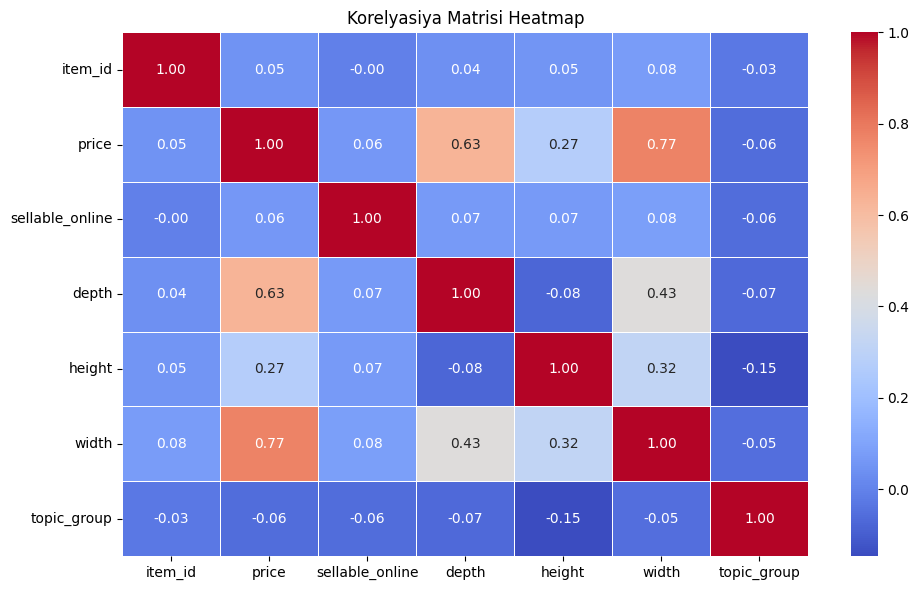

In [150]:
data_corr = data.dropna(subset=['depth'])

# Korelyasiya matrisini hesablayırıq (yalnız ədədi sütunlar üçün)
correlation_matrix = data_corr.corr(numeric_only=True)

# Heatmap plotu
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelyasiya Matrisi Heatmap")
plt.tight_layout()
plt.show()

KNI Imputer

In [151]:
from sklearn.impute import KNNImputer

data_encoded = pd.get_dummies(data, columns=['category'], drop_first=True)

imputer = KNNImputer(n_neighbors=5)
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns

data_encoded[numeric_cols] = imputer.fit_transform(data_encoded[numeric_cols])
data['depth'] = data_encoded['depth']

In [152]:
data["depth"].isnull().sum()

np.int64(0)

In [153]:
data.columns

Index(['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online',
       'link', 'other_colors', 'short_description', 'designer', 'depth',
       'height', 'width', 'product_description', 'current_status', 'keywords',
       'topic_group', 'topic_desc'],
      dtype='object')

In [154]:
data_encoded = pd.get_dummies(data, columns=['category'], drop_first=True)
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns

data_encoded[numeric_cols] = imputer.fit_transform(data_encoded[numeric_cols])

data['width'] = data_encoded['width']
data['height'] = data_encoded['height']

In [155]:
data.shape

(3694, 18)

In [156]:
print(data.isnull().sum())

item_id                   0
name                      0
category                  0
price                     0
old_price                 0
sellable_online           0
link                      0
other_colors              0
short_description         0
designer                  0
depth                     0
height                    0
width                     0
product_description       0
current_status            0
keywords               2300
topic_group            2285
topic_desc             2285
dtype: int64


In [157]:
data['keywords'].fillna('', inplace=True)
data['topic_group'].fillna('', inplace=True)
data['topic_desc'].fillna('', inplace=True)

<ipython-input-157-0c7ff2cfc4f5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['keywords'].fillna('', inplace=True)
<ipython-input-157-0c7ff2cfc4f5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [158]:
print(data.isnull().sum())

item_id                0
name                   0
category               0
price                  0
old_price              0
sellable_online        0
link                   0
other_colors           0
short_description      0
designer               0
depth                  0
height                 0
width                  0
product_description    0
current_status         0
keywords               0
topic_group            0
topic_desc             0
dtype: int64


Boolean Conversion: Ensure the sellable_online column is a proper boolean type.

In [159]:
data['sellable_online'] = data['sellable_online'].astype(bool)

<ipython-input-160-182acfaef937>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sellable_online', data=data, palette='Set2')


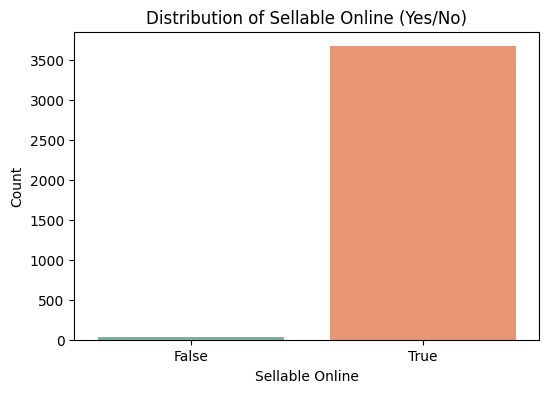

In [160]:
data['sellable_online'].value_counts()

# Plot the distribution of 'yes' and 'no'
plt.figure(figsize=(6, 4))
sns.countplot(x='sellable_online', data=data, palette='Set2')
plt.title('Distribution of Sellable Online (Yes/No)')
plt.xlabel('Sellable Online')
plt.ylabel('Count')
plt.show()

**Exploratory Data Analysis (EDA) Tasks:**

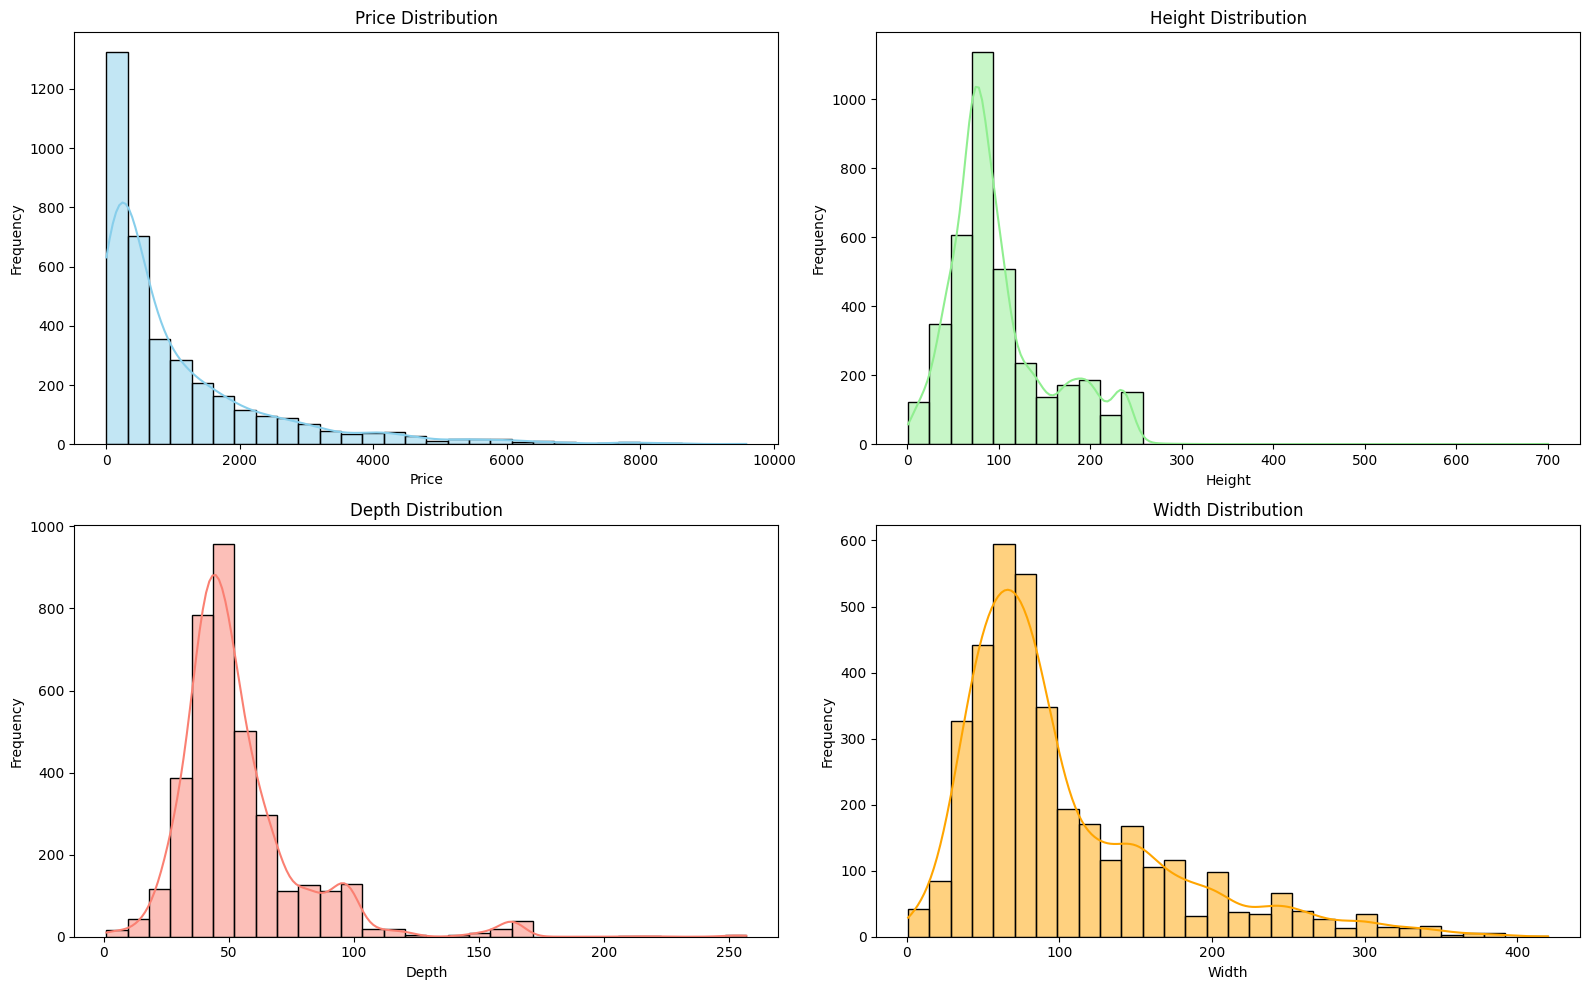

In [161]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['price'], kde=True, color='skyblue', bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(data['height'], kde=True, color='lightgreen', bins=30)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(data['depth'], kde=True, color='salmon', bins=30)
plt.title('Depth Distribution')
plt.xlabel('Depth')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(data['width'], kde=True, color='orange', bins=30)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


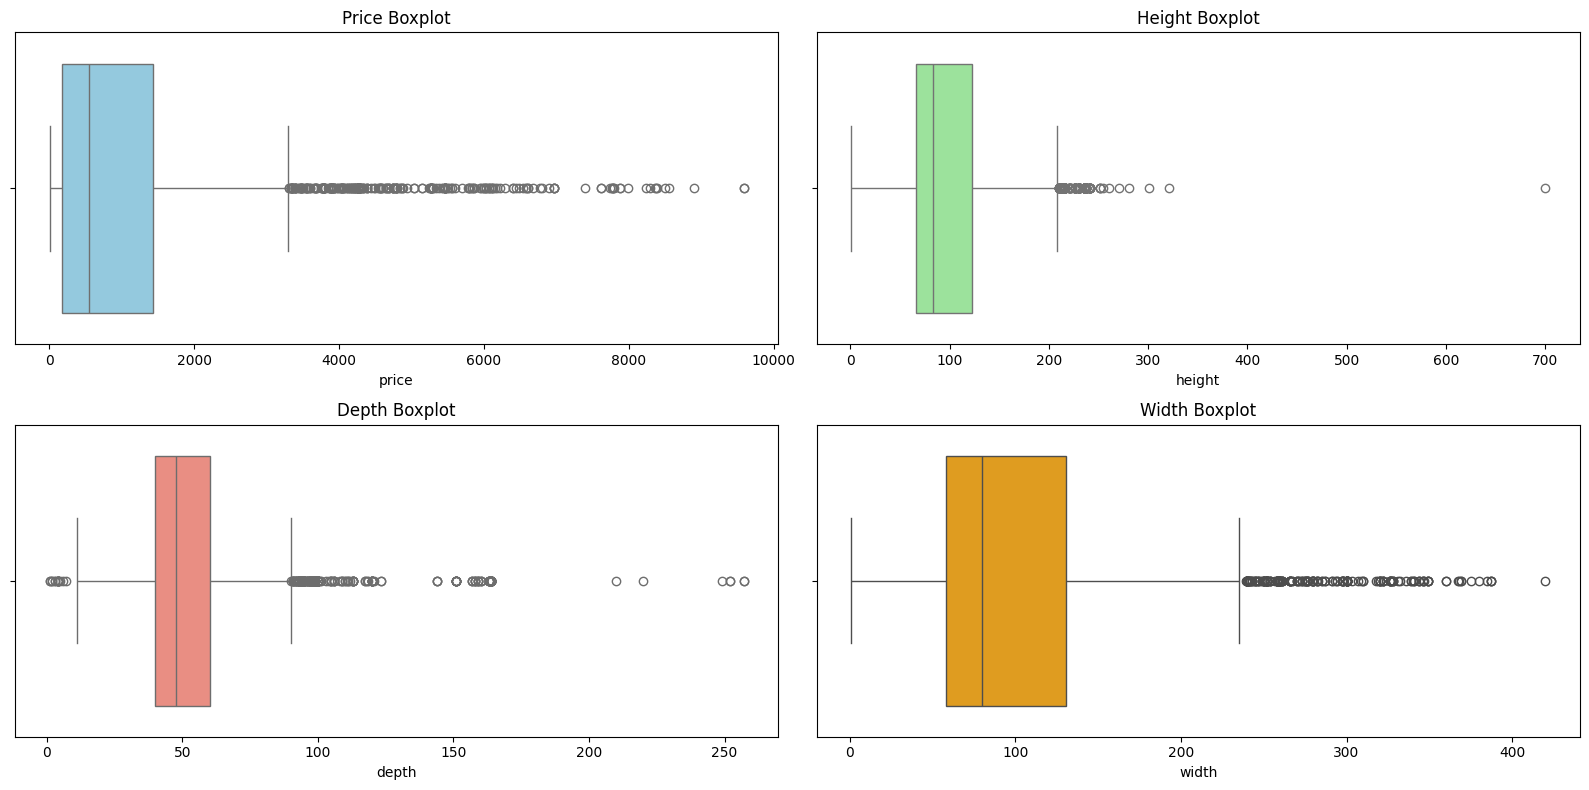

In [162]:
# Box plots for price, height, depth, and width
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=data['price'], color='skyblue')
plt.title('Price Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(x=data['height'], color='lightgreen')
plt.title('Height Boxplot')

plt.subplot(2, 2, 3)
sns.boxplot(x=data['depth'], color='salmon')
plt.title('Depth Boxplot')

plt.subplot(2, 2, 4)
sns.boxplot(x=data['width'], color='orange')
plt.title('Width Boxplot')

plt.tight_layout()
plt.show()

Category Insights: Find the most common product categories and their average prices.

In [163]:
most_common_category = data['category'].value_counts().idxmax()
category_counts = data['category'].value_counts()

print(f"Most common product category: {most_common_category}")
print(f"Count of most common category: {category_counts[most_common_category]}")

print("\nAll category counts:")
print(category_counts)

Most common product category: Tables & desks
Count of most common category: 612

All category counts:
category
Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Caf√© furniture                          26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: count, dtype: int64


In [164]:
category_avg_price = data.groupby('category')['price'].mean().reset_index()
category_avg_price = category_avg_price.sort_values(by='price', ascending=False)
print("\nAverage Prices per Category:\n", category_avg_price)



Average Prices per Category:
                                 category        price
16                             Wardrobes  2162.141949
12                     Sofas & armchairs  2004.016355
1                                   Beds  1647.432692
14                        Tables & desks  1129.395425
11  Sideboards, buffets & console tables  1068.086957
5                                 Chairs  1048.932640
10                         Room dividers   932.000000
9                      Outdoor furniture   859.826852
3                   Cabinets & cupboards   789.015753
0                          Bar furniture   679.553191
15                              Trolleys   678.517857
13                  TV & media furniture   659.050526
6       Chests of drawers & drawer units   612.180000
4                        Caf√© furniture   553.884615
2             Bookcases & shelving units   519.416058
8                      Nursery furniture   393.659794
7                   Children's furniture   272.7580

Online Availability: Investigate the proportion of products available for online purchase.

In [165]:
data

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,keywords,topic_group,topic_desc
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,48.8,99.0,51.0,Item discontinued,Item discontinued,,,
1,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,,,
2,50420329,FREKVENS,Bar furniture,177.0,SR 295,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,,,
3,400550,EKEDALEN,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,,,
4,40426138,HENRIKSDAL,Bar furniture,395.0,No old price,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,19385677,PAX,Wardrobes,2505.0,No old price,True,https://www.ikea.com/sa/en/p/pax-wardrobe-comb...,Yes,"Wardrobe combination, 150x58x...",Ehl√©n Johansson/Ola Wihlborg/IKEA of Sweden,58.0,236.0,150.0,Shop for fitted wardrobes online at IKEA Saudi...,Item still available for sale,fitted online stylish,1.0,Style and Functionality
3690,39329299,PAX / FORSAND/VIKEDAL,Wardrobes,1260.0,No old price,True,https://www.ikea.com/sa/en/p/pax-forsand-viked...,Yes,"Wardrobe combination, 75x60x2...",Ehl√©n Johansson/IKEA of Sweden,60.0,201.0,75.0,Shop for fitted wardrobes online at IKEA Saudi...,Item still available for sale,fitted online stylish,1.0,Style and Functionality
3691,79302995,ELVARLI,Wardrobes,1611.0,"SR 1,815",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehl√©n Johansson,50.0,97.0,175.0,"ELVARLI wardrobe combination, white, 175x51x22...",Item still available for sale,white 175x51x222-350 Make lovely decorative ad...,2.0,Durability and Appearance
3692,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehl√©n Johansson,50.0,133.6,91.0,"ELVARLI wardrobe combination, white, 92x51x222...",Item still available for sale,white 92x51x222-350 Make lovely decorative adj...,2.0,Durability and Appearance


In [166]:
online_products=data[data['sellable_online']==True]
total_products=len(data)

proportion_online=len(online_products)/total_products
print(f"Proportion of products available for online purcharse:{proportion_online:.2f}")

Proportion of products available for online purcharse:0.99


In [167]:
print(data['sellable_online'].value_counts())

sellable_online
True     3666
False      28
Name: count, dtype: int64


In [168]:
total_products

3694

In [169]:
len(online_products)

3666

In [170]:
(data['sellable_online']==True).sum()

np.int64(3666)

Price Change Analysis: Determine how many products have a recorded change between price and old_price.

In [171]:
price_changed=data[data['price']!=data['old_price']]
number_changed_products=len(price_changed)

print(f'Number of products with a price change:{number_changed_products}')

Number of products with a price change:3694


In [172]:
equal_prices_count = (data['price'] == data['old_price']).sum()
print(f"Bərabər qiymətə sahib məhsul sayı: {equal_prices_count}")

Bərabər qiymətə sahib məhsul sayı: 0


In [173]:
total_products = len(data)
equal_prices_count = (data['price'] == data['old_price']).sum()
equal_prices_ratio = equal_prices_count / total_products

print(f"Bərabər qiymətə sahib məhsulların nisbəti: {equal_prices_ratio:.2%}")

Bərabər qiymətə sahib məhsulların nisbəti: 0.00%


**Feature Engineering Tasks:**

Price Difference Feature: Create a new feature representing the difference

between price and old_price (where applicable).

In [174]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['old_price'] = pd.to_numeric(data['old_price'], errors='coerce')


nan_rows = data[data['price'].isna() | data['old_price'].isna()]

print("NaN olan sətirlər:")
print(nan_rows)

data['price_difference'] = data['price'] - data['old_price']

print(data[['price', 'old_price', 'price_difference']].head())

NaN olan sətirlər:
       item_id                   name       category   price  old_price  \
0     90420332               FREKVENS  Bar furniture   265.0        NaN   
1     80155205                   STIG  Bar furniture    69.0        NaN   
2     50420329               FREKVENS  Bar furniture   177.0        NaN   
3       400550               EKEDALEN  Bar furniture   345.0        NaN   
4     40426138             HENRIKSDAL  Bar furniture   395.0        NaN   
...        ...                    ...            ...     ...        ...   
3689  19385677                    PAX      Wardrobes  2505.0        NaN   
3690  39329299  PAX / FORSAND/VIKEDAL      Wardrobes  1260.0        NaN   
3691  79302995                ELVARLI      Wardrobes  1611.0        NaN   
3692  99157902                ELVARLI      Wardrobes   750.0        NaN   
3693   9158152                ELVARLI      Wardrobes  1572.0        NaN   

      sellable_online                                               link  \
0   

In [175]:
data['price_difference'].value_counts()

,count
price_difference,


In [176]:
data.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,keywords,topic_group,topic_desc,price_difference
0,90420332,FREKVENS,Bar furniture,265.0,NaN,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,48.8,99.0,51.0,Item discontinued,Item discontinued,,,,NaN
1,80155205,STIG,Bar furniture,69.0,NaN,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,,,,NaN
2,50420329,FREKVENS,Bar furniture,177.0,NaN,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,,,,NaN
3,400550,EKEDALEN,Bar furniture,345.0,NaN,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,,,,NaN
4,40426138,HENRIKSDAL,Bar furniture,395.0,NaN,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,,,,NaN


In [177]:
data['price_difference'].isnull().sum()

np.int64(3694)

In [178]:
print(data[data['price_difference'].notna()].head())

Empty DataFrame
Columns: [item_id, name, category, price, old_price, sellable_online, link, other_colors, short_description, designer, depth, height, width, product_description, current_status, keywords, topic_group, topic_desc, price_difference]
Index: []


In [179]:
print(data['price_difference'].notna().sum())

0


In [180]:
print(data[['price', 'old_price']].isna().sum())

price           0
old_price    3694
dtype: int64


In [181]:
print(data['price'].unique())
print(data['old_price'].unique())

[2.6500e+02 6.9000e+01 1.7700e+02 3.4500e+02 3.9500e+02 1.4000e+02
 5.9500e+02 7.9600e+02 6.9500e+02 4.3500e+02 1.2660e+03 4.0000e+01
 1.3850e+03 2.1760e+03 7.4500e+02 1.7500e+02 9.9500e+02 5.2500e+02
 1.7290e+03 1.0000e+02 2.6005e+03 2.9500e+02 2.0400e+03 8.9500e+02
 1.7450e+03 8.7100e+02 4.8000e+02 2.1950e+03 1.7250e+03 2.4250e+03
 1.4000e+03 8.5510e+03 1.4700e+03 2.1850e+03 9.5000e+01 1.8480e+03
 1.5900e+03 7.9500e+02 2.1460e+03 7.7960e+03 1.4450e+03 2.5950e+03
 2.6700e+02 1.2850e+03 8.4900e+02 2.9050e+03 3.0000e+01 1.1390e+03
 1.1600e+03 2.0850e+03 1.0920e+03 2.1635e+03 1.4900e+02 1.9150e+03
 2.4950e+03 2.2950e+03 2.9020e+03 1.9900e+03 8.7500e+02 3.5950e+03
 7.6100e+03 1.7950e+03 2.0950e+03 1.0950e+03 1.9910e+03 2.2100e+03
 1.1750e+03 9.5850e+03 4.4880e+03 5.7800e+03 3.3400e+03 4.9500e+02
 2.0000e+02 2.2360e+03 1.8000e+03 4.6450e+03 1.2950e+03 5.0000e+01
 8.3560e+03 1.8410e+03 2.9950e+03 4.3200e+03 1.5960e+03 1.5200e+03
 3.0000e+02 7.7850e+03 4.2700e+03 2.0250e+03 2.9450e+03 4.7900

In [182]:
#data['old_price'].fillna(0) replace NAN with zero(0)

data['price_difference'] = data['price'] - data['old_price'].fillna(0)

In [183]:
data['price_difference'].head()

,price_difference
0,265.0
1,69.0
2,177.0
3,345.0
4,395.0


In [184]:
#Eyni kateqoriyaya görə old_price median ilə doldurmaq
data['old_price'] = data.groupby('category')['old_price'].transform(lambda x: x.fillna(x.median()))

In [185]:
valid_data = data[data['old_price'].notna()]
valid_data['price_difference'] = valid_data['price'] - valid_data['old_price']

In [186]:
data['has_old_price'] = data['old_price'].notna()

In [187]:
#sale products

discounted_products = data[data['price_difference'] > 0]
print(f"Endirim olunan məhsulların sayı: {len(discounted_products)}")


Endirim olunan məhsulların sayı: 3694


category
Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Caf√© furniture                          26
Sideboards, buffets & console tables     23
Room dividers                            13
dtype: int64


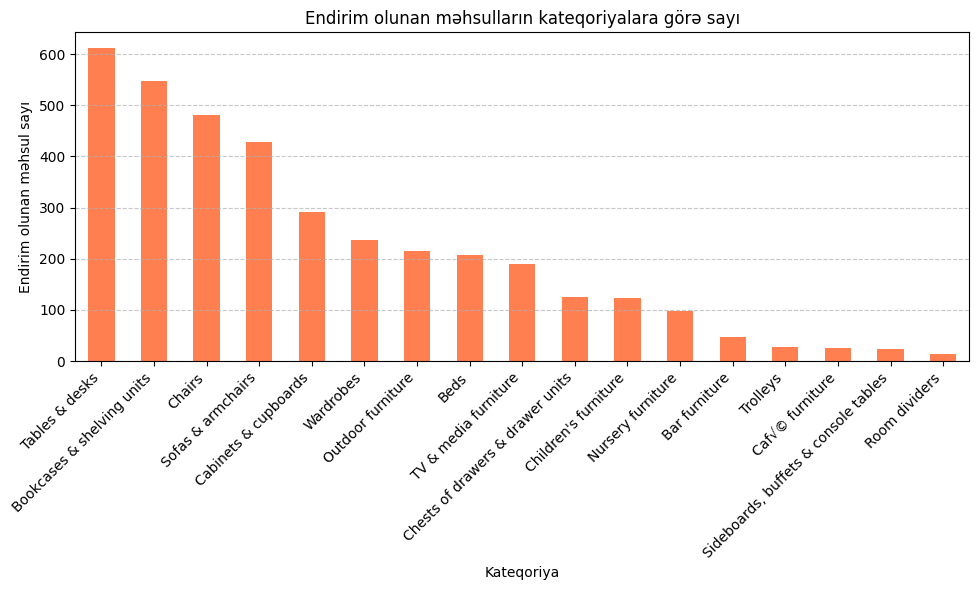

In [188]:
discount_count_by_category = discounted_products.groupby('category').size().sort_values(ascending=False)
print(discount_count_by_category)

plt.figure(figsize=(10, 6))
discount_count_by_category.plot(kind='bar', color ='coral')
plt.title('Endirim olunan məhsulların kateqoriyalara görə sayı')
plt.xlabel('Kateqoriya')
plt.ylabel('Endirim olunan məhsul sayı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Text Features: Use NLP techniques to vectorize short_description and product_description for input into models.**

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer

data['full_description']=data['short_description']+' '+data['product_description']

tfidf=TfidfVectorizer(stop_words='english',max_features=5000)

X_text=tfidf.fit_transform(data['full_description'])


Label Encoding: Encode categorical columns like category and designer for model input.

In [190]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
data['category_encoded']=label_encoder.fit_transform(data['category'])
data['designer_encoded']=label_encoder.fit_transform(data['designer'])

In [191]:
data

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,...,product_description,current_status,keywords,topic_group,topic_desc,price_difference,has_old_price,full_description,category_encoded,designer_encoded
0,90420332,FREKVENS,Bar furniture,265.0,NaN,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,...,Item discontinued,Item discontinued,,,,265.0,False,"Bar table, in/outdoor, 51x51 ...",0,333
1,80155205,STIG,Bar furniture,69.0,NaN,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,...,Item discontinued,Item discontinued,,,,69.0,False,"Bar stool with backrest, 74 c...",0,189
2,50420329,FREKVENS,Bar furniture,177.0,NaN,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,...,Item discontinued,Item discontinued,,,,177.0,False,"Bar stool with backrest, in/outdoor, ...",0,333
3,400550,EKEDALEN,Bar furniture,345.0,NaN,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,...,Item discontinued,Item discontinued,,,,345.0,False,"Bar stool with backrest, 75 c...",0,138
4,40426138,HENRIKSDAL,Bar furniture,395.0,NaN,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,...,Item discontinued,Item discontinued,,,,395.0,False,"Bar stool with backrest frame, ...",0,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,19385677,PAX,Wardrobes,2505.0,NaN,True,https://www.ikea.com/sa/en/p/pax-wardrobe-comb...,Yes,"Wardrobe combination, 150x58x...",Ehl√©n Johansson/Ola Wihlborg/IKEA of Sweden,...,Shop for fitted wardrobes online at IKEA Saudi...,Item still available for sale,fitted online stylish,1.0,Style and Functionality,2505.0,False,"Wardrobe combination, 150x58x...",16,151
3690,39329299,PAX / FORSAND/VIKEDAL,Wardrobes,1260.0,NaN,True,https://www.ikea.com/sa/en/p/pax-forsand-viked...,Yes,"Wardrobe combination, 75x60x2...",Ehl√©n Johansson/IKEA of Sweden,...,Shop for fitted wardrobes online at IKEA Saudi...,Item still available for sale,fitted online stylish,1.0,Style and Functionality,1260.0,False,"Wardrobe combination, 75x60x2...",16,145
3691,79302995,ELVARLI,Wardrobes,1611.0,NaN,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehl√©n Johansson,...,"ELVARLI wardrobe combination, white, 175x51x22...",Item still available for sale,white 175x51x222-350 Make lovely decorative ad...,2.0,Durability and Appearance,1611.0,False,"2 sections, 175x51x222-350 cm...",16,138
3692,99157902,ELVARLI,Wardrobes,750.0,NaN,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehl√©n Johansson,...,"ELVARLI wardrobe combination, white, 92x51x222...",Item still available for sale,white 92x51x222-350 Make lovely decorative adj...,2.0,Durability and Appearance,750.0,False,"1 section, 92x51x222-350 cm E...",16,138


In [192]:
data_model = data.drop('old_price', axis=1)

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item_id              3694 non-null   int64  
 1   name                 3694 non-null   object 
 2   category             3694 non-null   object 
 3   price                3694 non-null   float64
 4   old_price            0 non-null      float64
 5   sellable_online      3694 non-null   bool   
 6   link                 3694 non-null   object 
 7   other_colors         3694 non-null   object 
 8   short_description    3694 non-null   object 
 9   designer             3694 non-null   object 
 10  depth                3694 non-null   float64
 11  height               3694 non-null   float64
 12  width                3694 non-null   float64
 13  product_description  3694 non-null   object 
 14  current_status       3694 non-null   object 
 15  keywords             3694 non-null   o

**Model Building and Evaluation:**

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.sparse import hstack


model_features = [
    'price',
    'price_difference',
    'depth', 'height', 'width',
    'category_encoded',
    'designer_encoded',
    'sellable_online',
    'has_old_price'
]
# 1. Mətn və rəqəmsal xüsusiyyətləri ayır
X_text = data['full_description']
X_numeric = data[model_features].astype(float)  # full_description burda YOXDU

# 2. Target
y = data['current_status']

# 3. Train-test bölməsi
X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)

# 4. TF-IDF yalnız train-ə fit
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

# 5. Kombinə et
X_train_final = hstack([X_train_num, X_train_vec])
X_test_final = hstack([X_test_num, X_test_vec])

# 6. Model fit
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_final, y_train)

# 7. Nəticə
y_pred = model.predict(X_test_final)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


                               precision    recall  f1-score   support

            Item discontinued       1.00      1.00      1.00       488
Item still available for sale       1.00      1.00      1.00       251

                     accuracy                           1.00       739
                    macro avg       1.00      1.00      1.00       739
                 weighted avg       1.00      1.00      1.00       739

[[488   0]
 [  0 251]]


In [217]:
from sklearn.model_selection import GridSearchCV

# 1. Parametr gridini təyin edək
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 2. Modeli yarat
rf = RandomForestClassifier(random_state=42)

# 3. GridSearchCV qur
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1
)

# 4. Modeli train datası ilə fit et
grid_search.fit(X_train_final, y_train)

# 5. Ən yaxşı parametrlər
print("🔍 Ən yaxşı parametrlər:\n", grid_search.best_params_)

# 6. Ən yaxşı model ilə test et
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_final)

# 7. Qiymətləndirmə
from sklearn.metrics import classification_report, confusion_matrix
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("🧱 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
🔍 Ən yaxşı parametrlər:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
📊 Classification Report:

                               precision    recall  f1-score   support

            Item discontinued       1.00      1.00      1.00       488
Item still available for sale       1.00      1.00      1.00       251

                     accuracy                           1.00       739
                    macro avg       1.00      1.00      1.00       739
                 weighted avg       1.00      1.00      1.00       739

🧱 Confusion Matrix:

[[488   0]
 [  0 251]]


XGBOOST model

In [220]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


XGB = xgb.XGBClassifier(random_state=42)
XGB.fit(X_train_final, y_train_encoded)

XGB_pred = XGB.predict(X_test_final)

print(classification_report(y_test_encoded, XGB_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       488
           1       1.00      1.00      1.00       251

    accuracy                           1.00       739
   macro avg       1.00      1.00      1.00       739
weighted avg       1.00      1.00      1.00       739



Feature Importance

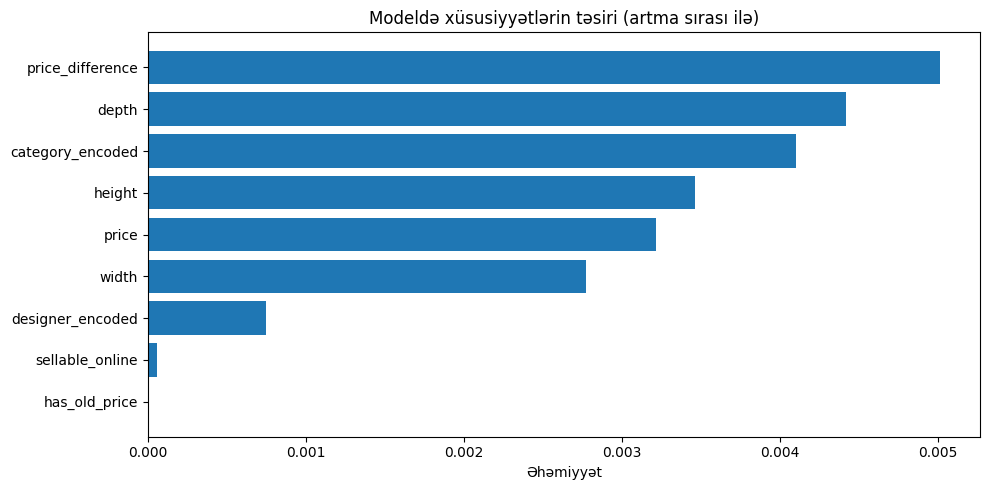

In [212]:
importance_df = pd.DataFrame({
    'Feature': model_features,
    'Importance': RF.feature_importances_[:len(model_features)]
})

# Ascending sort
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Importance'])
plt.xlabel("Əhəmiyyət")
plt.title("Modeldə xüsusiyyətlərin təsiri (artma sırası ilə)")
plt.tight_layout()
plt.show()
